In [51]:
library(MuMIn)

In [1]:
data.raw = read.table("crabs.dat.txt", header = TRUE)

In [2]:
data.raw$color = factor(data.raw$color)
data.raw$y = factor(data.raw$y)

In [35]:
require(MASS)
options(warn=-1)

poisson.color = glm(spine ~ color, family = poisson(link = log), data = data.raw)
quasipoisson.color = glm(spine ~ color, family = quasipoisson(link = log), data = data.raw)
quasipoisson.weight.weightcolor = glm(spine ~ weight + weight:color, family = quasipoisson(link = log), data = data.raw)
nb.color = glm.nb(spine ~ color, data = data.raw)
summary(poisson.color)
summary(quasipoisson.color)
summary(quasipoisson.weight.weightcolor)
summary(nb.color)


Call:
glm(formula = spine ~ color, family = poisson(link = log), data = data.raw)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.274  -0.273   0.135   0.366   1.238  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)    0.288      0.250    1.15   0.2498   
color2         0.592      0.259    2.29   0.0220 * 
color3         0.732      0.266    2.75   0.0059 **
color4         0.764      0.280    2.73   0.0063 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.604  on 169  degrees of freedom
AIC: 528.8

Number of Fisher Scoring iterations: 4



Call:
glm(formula = spine ~ color, family = quasipoisson(link = log), 
    data = data.raw)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.274  -0.273   0.135   0.366   1.238  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.288      0.121    2.38    0.018 *  
color2         0.592      0.125    4.74  4.6e-06 ***
color3         0.732      0.129    5.70  5.3e-08 ***
color4         0.764      0.135    5.65  6.8e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 0.234)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.604  on 169  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4



Call:
glm(formula = spine ~ weight + weight:color, family = quasipoisson(link = log), 
    data = data.raw)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.263  -0.286   0.146   0.330   1.248  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.0523     0.1044   10.08  < 2e-16 ***
weight         -0.2970     0.0610   -4.87  2.5e-06 ***
weight:color2   0.2316     0.0480    4.83  3.1e-06 ***
weight:color3   0.2786     0.0501    5.56  1.0e-07 ***
weight:color4   0.2942     0.0543    5.42  2.1e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 0.233)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.287  on 168  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4



Call:
glm.nb(formula = spine ~ color, data = data.raw, init.theta = 183942.6653, 
    link = log)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.274  -0.273   0.135   0.366   1.238  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)    0.288      0.250    1.15   0.2498   
color2         0.592      0.259    2.29   0.0220 * 
color3         0.732      0.266    2.75   0.0059 **
color4         0.764      0.280    2.73   0.0063 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(183943) family taken to be 1)

    Null deviance: 56.156  on 172  degrees of freedom
Residual deviance: 45.603  on 169  degrees of freedom
AIC: 530.8

Number of Fisher Scoring iterations: 1


              Theta:  183943 
          Std. Err.:  2342618 
Warning while fitting theta: iteration limit reached 

 2 x log-likelihood:  -521 

In [62]:
require(boot)

crossValidation <- function(mod) {
    set.seed(12345)
    rawError = signif(cv.glm(data.raw[, 2:7], mod, K = 10)$delta[1], 5)
    adjustedError = signif(cv.glm(data.raw[, 2:7], mod, K = 10)$delta[2], 5)
    c(rawCVError=rawError, adjustedCVError=adjustedError)
}

models = list(poisson.color = poisson.color,
              quasipoisson.color = quasipoisson.color,
              nb.color = nb.color, 
              quasipoisson.weight.weightcolor = quasipoisson.weight.weightcolor
             )

print(sapply(models, crossValidation, simplify = FALSE))

$poisson.color
     rawCVError adjustedCVError 
          0.572           0.568 

$quasipoisson.color
     rawCVError adjustedCVError 
          0.572           0.568 

$nb.color
     rawCVError adjustedCVError 
          0.572           0.568 

$quasipoisson.weight.weightcolor
     rawCVError adjustedCVError 
          0.585           0.581 



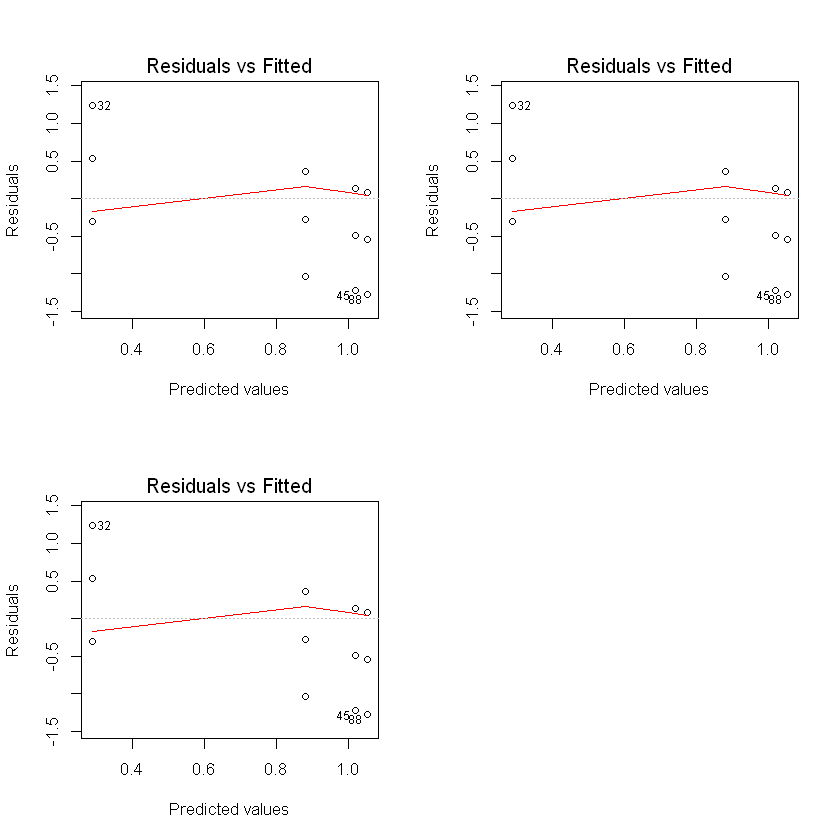

In [13]:
par(mfrow = c(2,2))
plot(poisson.color, which = 1)
plot(quasipoisson.color, which = 1)
plot(nb.color, which = 1)

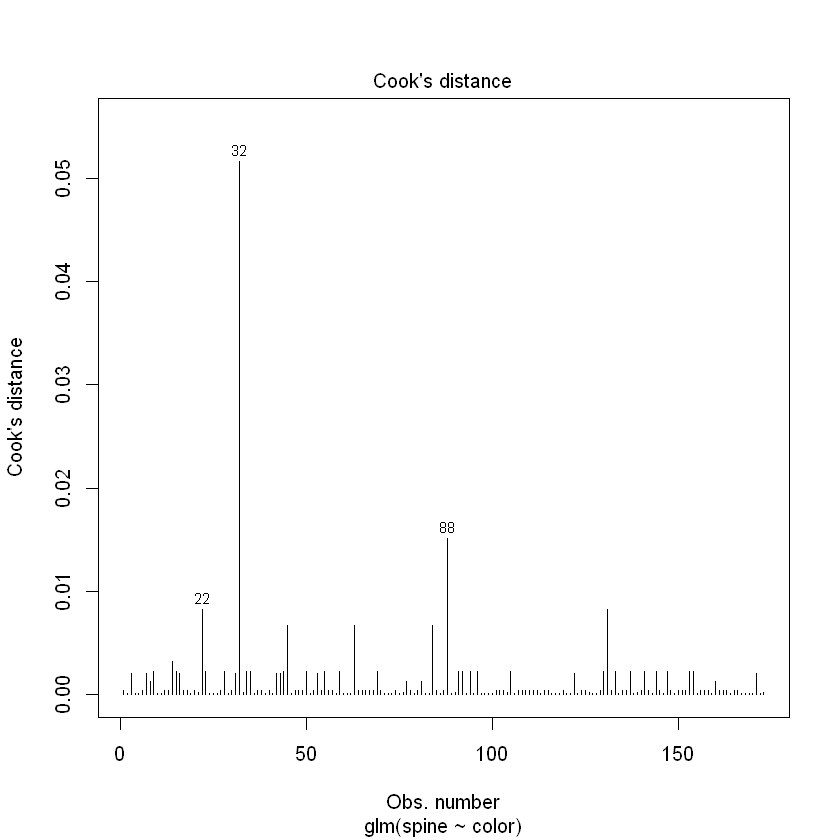

In [16]:
plot(poisson.color, which = 4)

People usually use 4/N as a cutoff. In our case, 4/173 = 0.023 . So 32nd point is considered a highly influential point.

In [10]:
data.raw.without32 = data.raw[-c(32), ] 

In [11]:
poisson.color.without32 = glm(spine ~ color, family = poisson(link = log), data = data.raw.without32)
quasipoisson.color.without32 = glm(spine ~ color, family = quasipoisson(link = log), data = data.raw.without32)
nb.color.without32 = glm.nb(spine ~ color, data = data.raw.without32)

In [13]:
summary(poisson.color)
summary(poisson.color.without32)
summary(nb.color.without32)


Call:
glm(formula = spine ~ color, family = poisson(link = log), data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2740  -0.2725   0.1347   0.3656   1.2378  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.2877     0.2500   1.151  0.24984   
color2        0.5922     0.2586   2.290  0.02202 * 
color3        0.7321     0.2659   2.754  0.00589 **
color4        0.7644     0.2800   2.731  0.00632 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.604  on 169  degrees of freedom
AIC: 528.82

Number of Fisher Scoring iterations: 4



Call:
glm(formula = spine ~ color, family = poisson(link = log), data = data.raw.without32)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2740  -0.1718   0.1347   0.3656   0.6841  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.1671     0.2774   0.602  0.54696   
color2        0.7128     0.2851   2.500  0.01242 * 
color3        0.8528     0.2918   2.923  0.00347 **
color4        0.8850     0.3046   2.905  0.00367 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.056  on 171  degrees of freedom
Residual deviance: 43.875  on 168  degrees of freedom
AIC: 524.1

Number of Fisher Scoring iterations: 4



Call:
glm.nb(formula = spine ~ color, data = data.raw.without32, init.theta = 198696.9813, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2740  -0.1718   0.1347   0.3656   0.6841  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.1671     0.2774   0.602  0.54696   
color2        0.7128     0.2851   2.500  0.01242 * 
color3        0.8528     0.2918   2.923  0.00347 **
color4        0.8850     0.3046   2.905  0.00367 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(198697) family taken to be 1)

    Null deviance: 56.056  on 171  degrees of freedom
Residual deviance: 43.874  on 168  degrees of freedom
AIC: 526.1

Number of Fisher Scoring iterations: 1


              Theta:  198697 
          Std. Err.:  2629960 
Warning while fitting theta: iteration limit reached 

 2 x log-likelihood:  -516.103 

In [49]:
crossValidation <- function(mod) {
    set.seed(12345)
    rawError = signif(cv.glm(data.raw.without32[, 2:7], mod, K = 10)$delta[1], 5)
    adjustedError = signif(cv.glm(data.raw.without32[, 2:7], mod, K = 10)$delta[2], 5)
    c(rawCVError=rawError, adjustedCVError=adjustedError)
}
models.without32 = list(poisson = poisson.color.without32,
              quasipoisson = quasipoisson.color.without32,
              nb.color = nb.color.without32
             )

print(sapply(models.without32, crossValidation, simplify = FALSE))

$poisson
     rawCVError adjustedCVError 
          0.546           0.542 

$quasipoisson
     rawCVError adjustedCVError 
          0.546           0.542 

$nb.color
     rawCVError adjustedCVError 
          0.546           0.542 



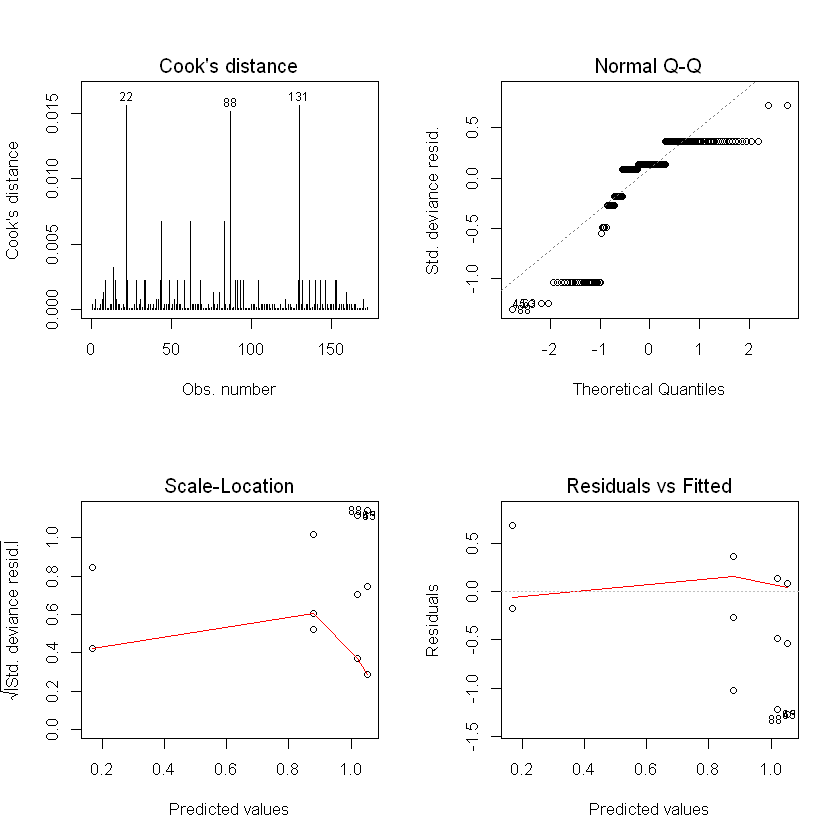

In [42]:
par(mfrow = c(2,2))
plot(poisson.color.without32, which = 4)
plot(poisson.color.without32, which = 2)
plot(poisson.color.without32, which = 3)
plot(poisson.color.without32, which = 1)